# Loan Prediction Project

This Project Identfies wether the customer is eligible for a loan or not 

The dataset contains the following columns:- 
    *Loan_ID : - The id of the customer.
    *Gender  : - The Gender of the customer.
    *Married : - Marital status of the customer.
    *Dependents : - Number of dependents the customer has.
    *Education : - Wether the customer is graduate or not a graduate.
    *Self Employed : - Wether the customer is self employed or not.
    *Applicant Income : - The income of the applicant.
    *Coapplicant Income : - The income of the coappicant.
    *Loan amount : - The amount of Loan the customer requested.
    *Loan_amount_term : - The term of repaying the loan.
    *Credit_History : - Credit history of the customer.
    *Property_Area : - Area of the property which is owned by the customer.
    *Loan_status : - Wether the customer was granted loan or not.

I have used Decision Tree,Random forest and Gradient Boosting Classifiers to classify the customers
Wether they will be granted a loan or not.

IMPORTING PACKAGES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix , recall_score , precision_score
from sklearn import tree
%matplotlib inline

In [5]:
#Defining the size of the chart
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [4]:
#Reading the input dataset

df = pd.read_csv('C:/Users/dharm/OneDrive/Desktop/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.shape

(614, 13)

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
#we can see that there are some missing values
#Imputing Missing values with mean for continuous variable
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)


#Imputing Missing values with mode for categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

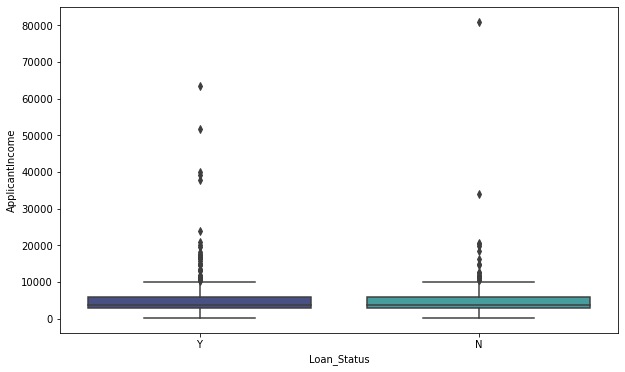

In [15]:
#Applicant Income vs Loan Status
sns.boxplot(data=df,x='Loan_Status',y='ApplicantIncome',palette='mako')

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

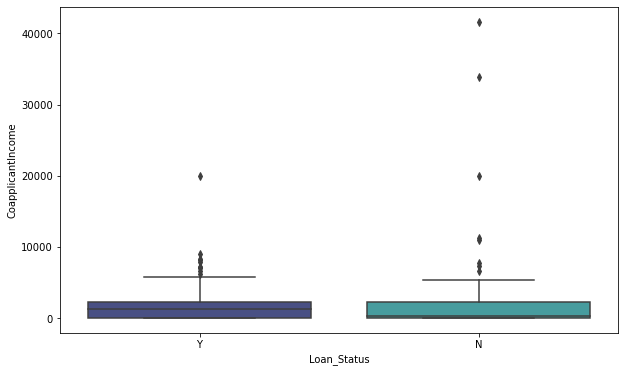

In [17]:
#we can see clearly that applicant income column has outliers
# We use Interquartile range to remove Outliers
#Calculate the IQR
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)
IQR=Q3-Q1
#Define the lower and upper bounds for outliers
lower_bound=Q1-1.5* IQR
upper_bound=Q3+1.5*IQR
#Remove outliers
df=df[(df['ApplicantIncome']>=lower_bound) & df['ApplicantIncome']<=upper_bound]

# CoapplicantIncome vs Loan Status
sns.boxplot(data=df,x='Loan_Status',y='CoapplicantIncome',palette='mako')

In [18]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


# Econding The categorical variables


In [19]:
#Encoding categorical columns
le = LabelEncoder()
# now this is used to transform gender to numerical values using below syntax
df["Gender"] = le.fit_transform(df["Gender"])
# similarly converting all remaining categorical featrues to numerical
df["Married"] = le.fit_transform(df["Married"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Education"] = le.fit_transform(df["Education"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [20]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

<AxesSubplot:xlabel='Education', ylabel='count'>

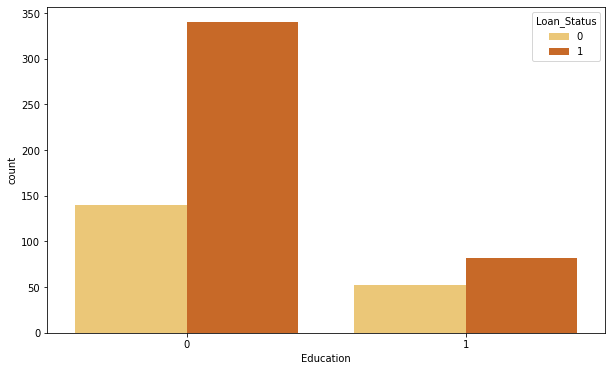

In [24]:
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='YlOrBr')

In [63]:
# Graduates - 0
# Not Graduates - 1

#we can see that graduates have higher chance of getting a loan.

<AxesSubplot:xlabel='Married', ylabel='count'>

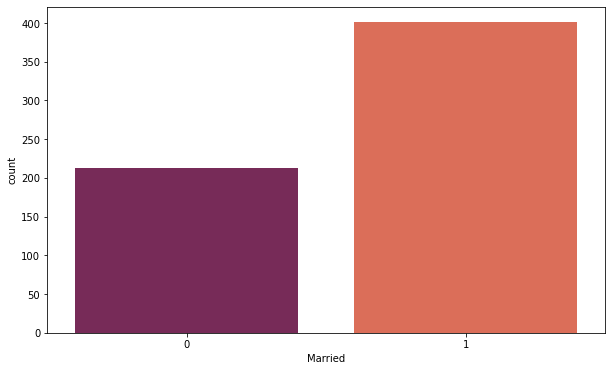

In [26]:
#Marital status vs Loan Status

sns.countplot(x='Married',data=df,palette='rocket')

<AxesSubplot:xlabel='Gender', ylabel='count'>

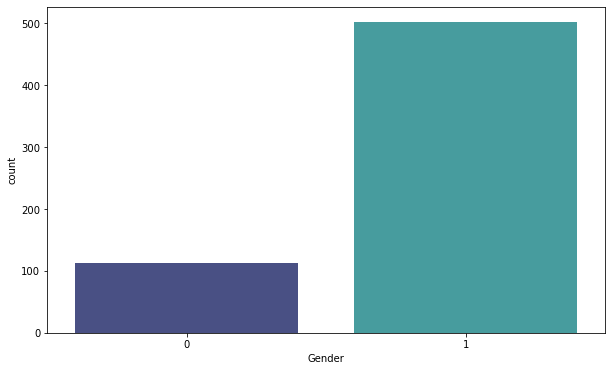

In [27]:
# married - 1
# unmarried - 0
# There are more married people
sns.countplot(x='Gender',data=df,palette='mako')
# we can see that there are more males and they are married

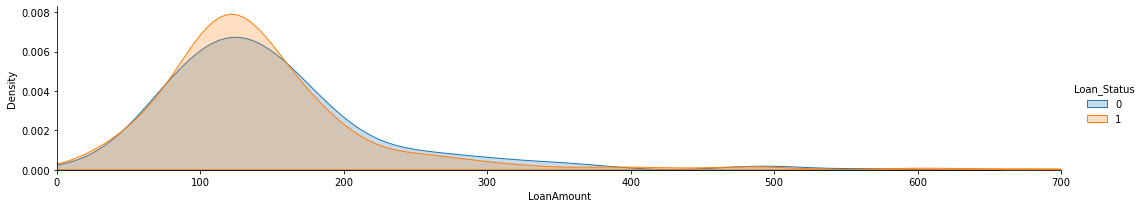

In [28]:
#Relationship between loan amount and loan status

as_fig = sns.FacetGrid(df,hue='Loan_Status',aspect=5)
as_fig.map(sns.kdeplot,'LoanAmount',shade=True)
oldest = df['LoanAmount'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [ ]:
# It seems that customers loan stastus is Y and N both are having similar distribution as in we 
#can see that their average loan amount is in the range 100-150.
 

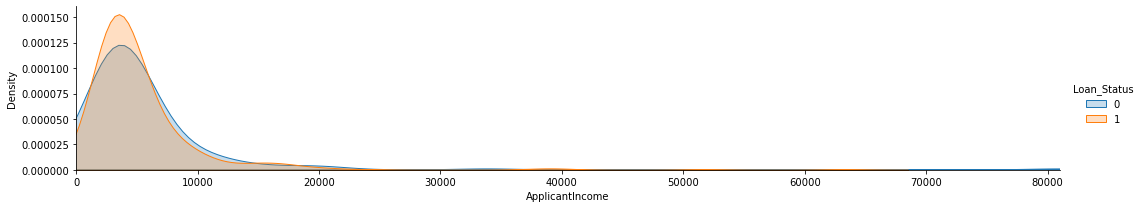

In [29]:
#Applicant income vs Loan status
as_fig = sns.FacetGrid(df,hue='Loan_Status',aspect=5)
as_fig.map(sns.kdeplot,'ApplicantIncome',shade=True)
oldest = df['ApplicantIncome'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [ ]:
# although there is distribution of applicant income we can see some of customers have loan status Y 
#and others N. We cannot strongly say this 
#parameters have any relationship

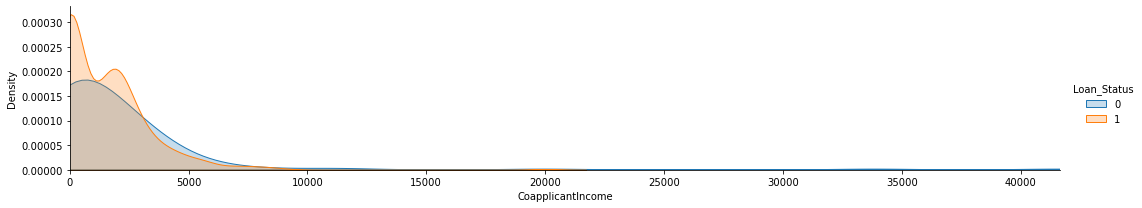

In [30]:
#Coapplicant Income vs Loan Status


as_fig = sns.FacetGrid(df,hue='Loan_Status',aspect=5)
as_fig.map(sns.kdeplot,'CoapplicantIncome',shade=True)
oldest = df['CoapplicantIncome'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()

In [ ]:
# similarly same pattern is observed in co-applicants income for 
#both customers with loan status Y and N

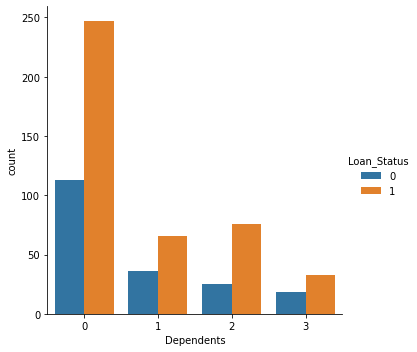

In [36]:
#Relationship between Dependents and Loan status.

sns.catplot('Dependents',kind='count',data=df,hue='Loan_Status')

In [65]:
#we can see that customers with less dependents are morelikely to get the loan

Loan_Status    0    1
Married              
0             79  134
1            113  288


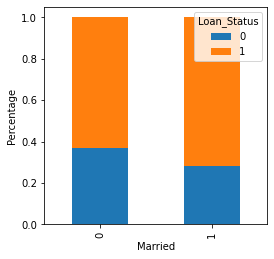

In [37]:
#Relation between Loan status and marital status

print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

In [64]:
# out of married customers, 71% have loan status as 1, 29% have laon status as 0
# out of unmarried customers, 62% have loan status as 1, 38% have loan status as 0

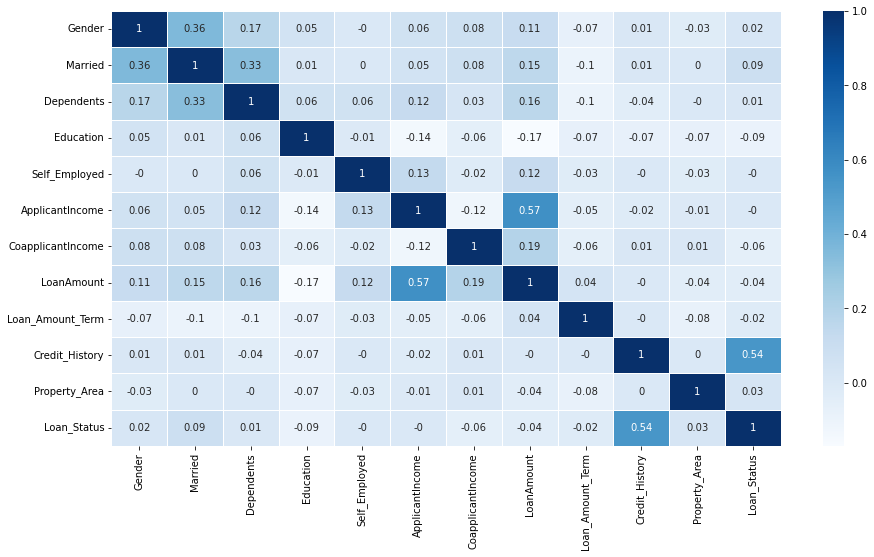

In [38]:
#Finding correlation between all the variables.

fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.5,cmap="Blues")
plt.show()

In [ ]:
# we can see strong positive corelation between credit history and loan status
#loan amount and applicant income

In [52]:
#Train-Test split

X = df.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term",'Loan_Status'],axis=1)
y = df['Loan_Status']
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)
Xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
46,1,1,1,0,0,1.0,2
272,1,0,0,0,0,1.0,0
474,1,0,2,0,0,1.0,0
382,0,0,0,0,0,1.0,2
283,0,0,0,0,0,1.0,2


Accuracy: 80.51948051948052 %
Precision: 79.707460809823 %
Recall: 80.51948051948052 %
F1 score: 78.94794281348901 %


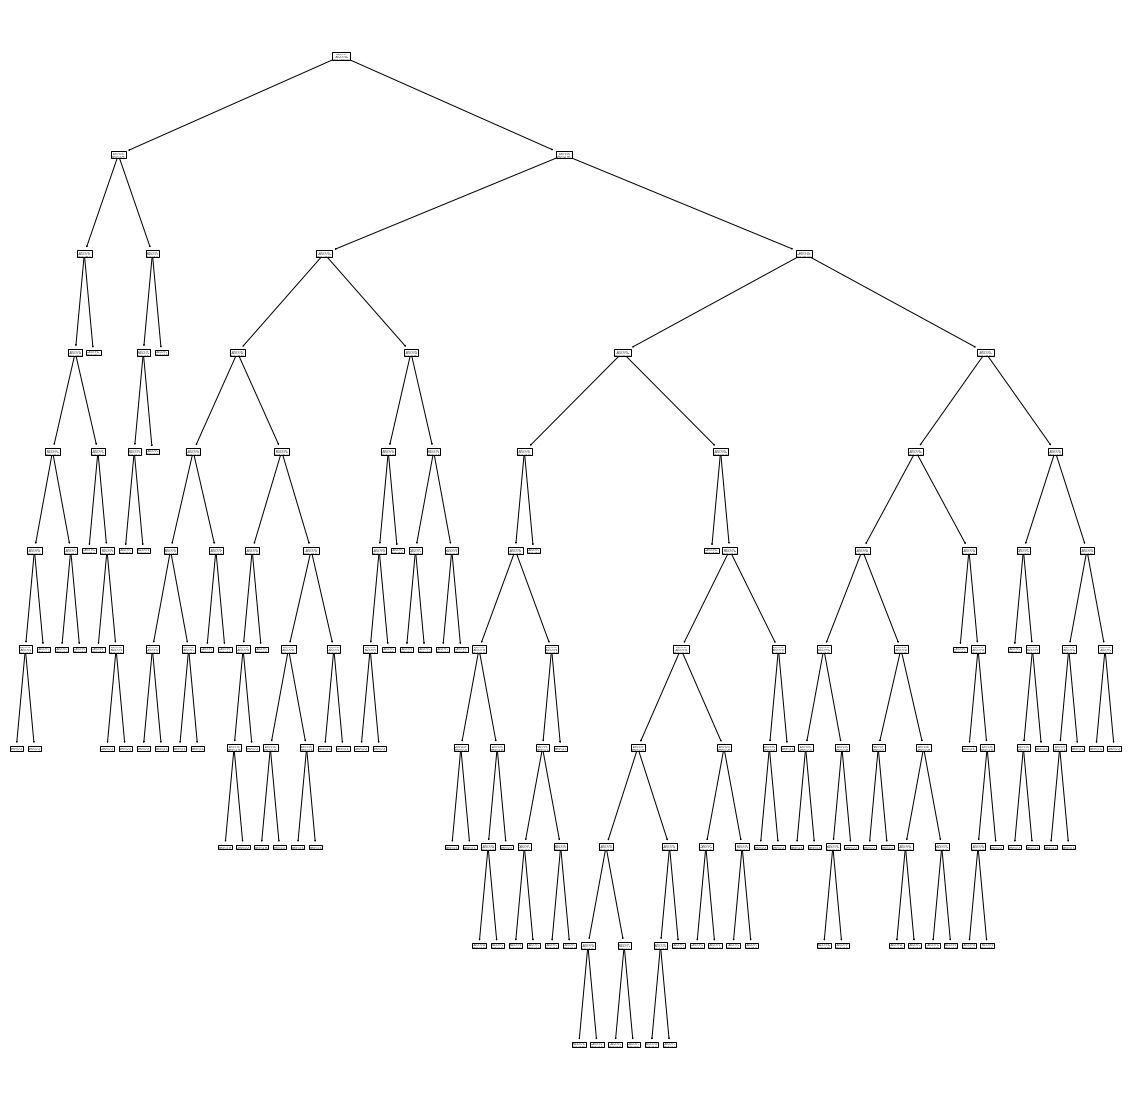

In [53]:
model=DecisionTreeClassifier()
model.fit(Xtrain,ytrain)
plt.figure(figsize=(20,20))
tree.plot_tree(model.fit(Xtrain,ytrain))
dt_predict = model.predict(Xtest)
print ('Accuracy:', accuracy_score(ytest, dt_predict)*100,"%")
print ('Precision:', precision_score(ytest, dt_predict,average='weighted')*100,"%")
print ('Recall:', recall_score(ytest, dt_predict,average='weighted')*100,"%")
print ('F1 score:', f1_score(ytest, dt_predict,average='weighted')*100,"%")

In [54]:
#Random forest
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain,ytrain)
rf_model_pred = rf_model.predict(Xtest)
print ('Accuracy:', accuracy_score(ytest, rf_model_pred)*100,"%")
print ('Precision:', precision_score(ytest, rf_model_pred,average='weighted')*100,"%")
print ('F1 score:', f1_score(ytest, rf_model_pred,average='weighted')*100,"%")
print ('Recall:', recall_score(ytest, rf_model_pred,average='weighted')*100,"%")

Accuracy: 81.81818181818183 %
Precision: 81.5644820295983 %
F1 score: 80.09358288770052 %
Recall: 81.81818181818183 %


In [55]:
#Gradient Boosting Classifier
model=GradientBoostingClassifier()
model.fit(Xtrain,ytrain)
plt.figure(figsize=(20,20))
dt_predict = model.predict(Xtest)
print ('Accuracy:', accuracy_score(ytest, dt_predict)*100,"%")
print ('Precision:', precision_score(ytest, dt_predict,average='weighted')*100,"%")
print ('Recall:', recall_score(ytest, dt_predict,average='weighted')*100,"%")
print ('F1 score:', f1_score(ytest, dt_predict,average='weighted')*100,"%")

Accuracy: 83.11688311688312 %
Precision: 83.70308748669187 %
Recall: 83.11688311688312 %
F1 score: 81.25648456226969 %


<Figure size 1440x1440 with 0 Axes>

In [57]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [59]:
df=df.drop("Loan_ID",axis=1)
rf_model = RandomForestClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

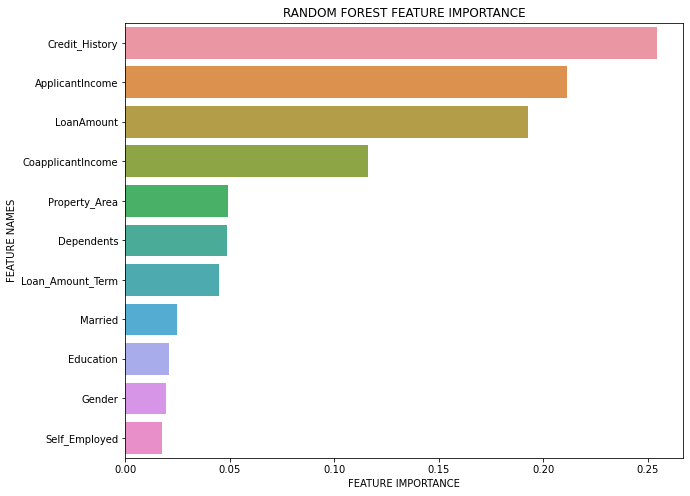

In [60]:
plot_feature_importance(rf_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'RANDOM FOREST')

In [61]:
gbc_model = GradientBoostingClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

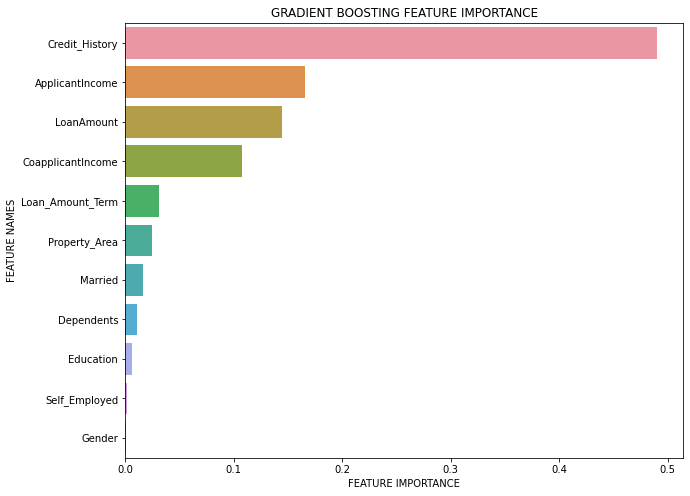

In [62]:
plot_feature_importance(gbc_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'GRADIENT BOOSTING')

In [ ]:
I have used Decision Trees,Random Forest and Gradient Boost to Predict the eligibility of Loan 
of the Customer.

Gradient Boost algorithm has given us the Highest accuracy of 83%.